In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
df=pd.read_csv('diabetes.csv')

In [59]:
df.shape

(768, 9)

In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [62]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [66]:
df.loc[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [67]:
df['Outcome'].value_counts() #How many patients have diabetes versus those who don’t?

,count
Outcome,
0,500
1,268


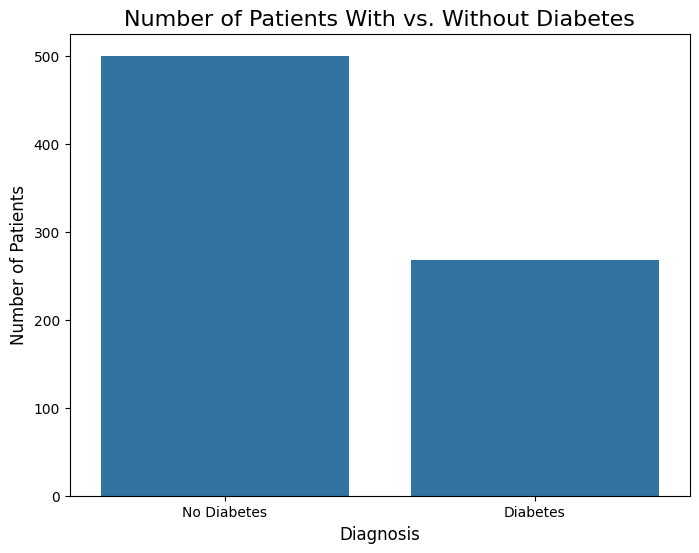

In [68]:
counts = df['Outcome'].value_counts()
counts_df = pd.DataFrame({'Outcome': counts.index, 'Count': counts.values})
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Count', data=counts_df)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.title('Number of Patients With vs. Without Diabetes', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

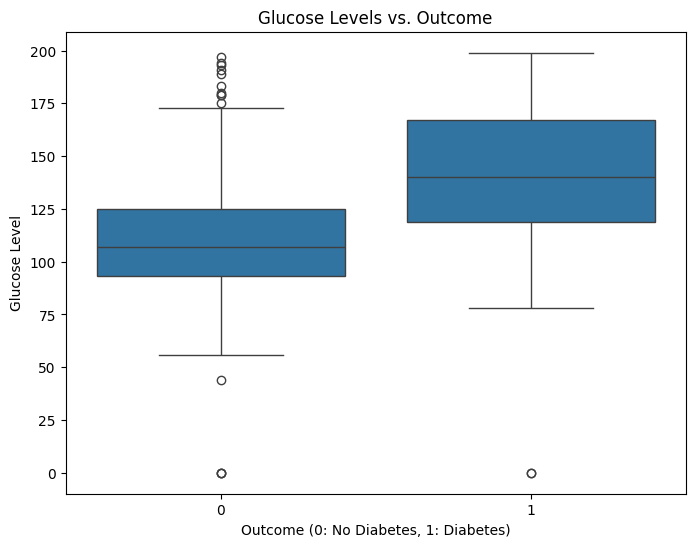

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose Levels vs. Outcome")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Glucose Level")
plt.show()

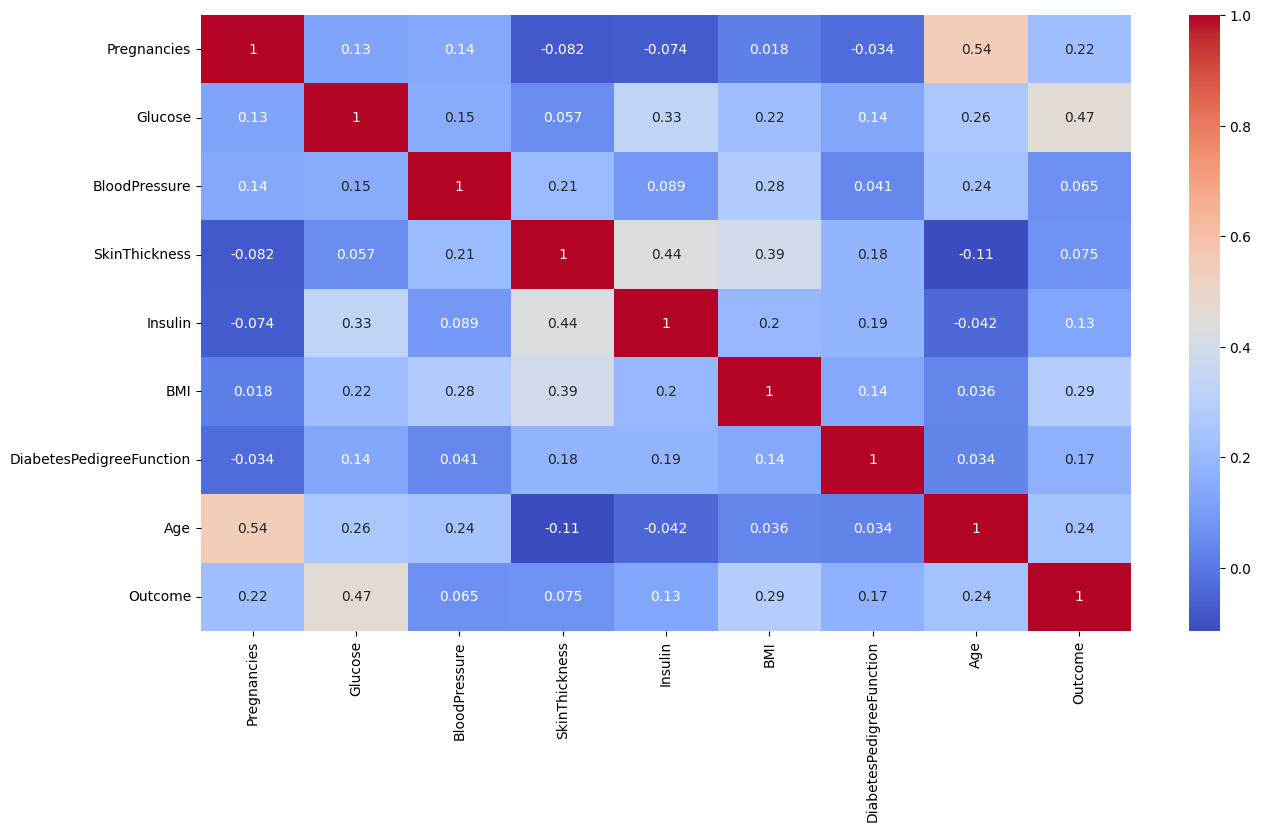

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()#the outcome has a strong relationship with glucose, BMI and Age

In [147]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
train_data=X_train.join(y_train)

In [149]:
test_data=X_test.join(y_test)

In [73]:
train_data.shape

(614, 9)

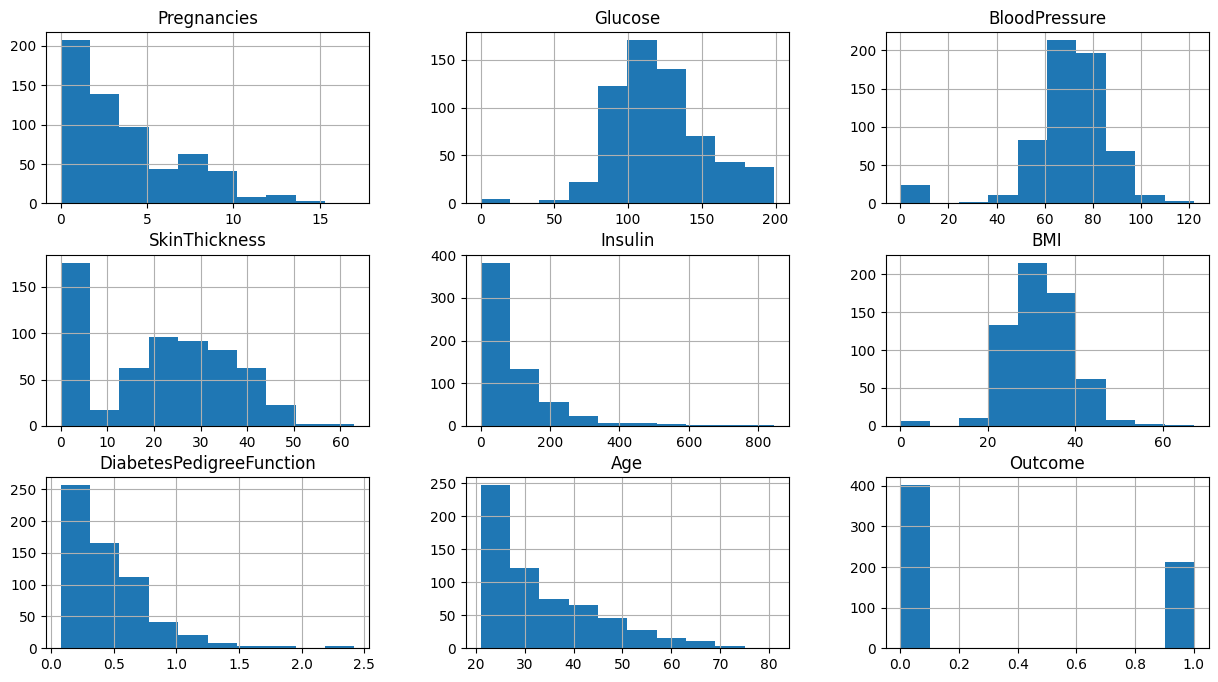

In [85]:
train_data.hist(figsize=(15,8))
plt.show()

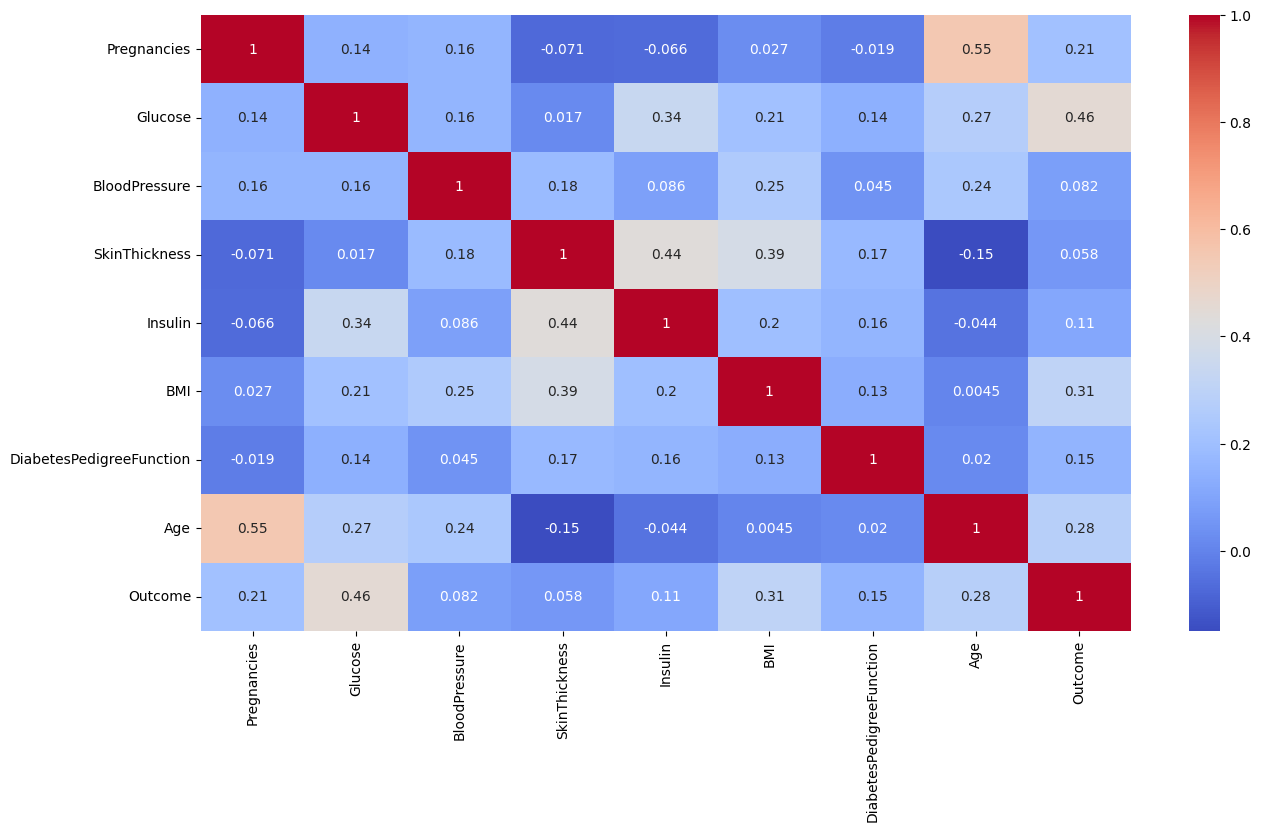

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [128]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= pd.DataFrame(sc_X.fit_transform(train_data.drop(['Outcome'], axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure',
                          'SkinThickness', 'Insulin', 'BMI',
                          'DiabetesPedigreeFunction', 'Age'])
train_data=X.join(df['Outcome'])

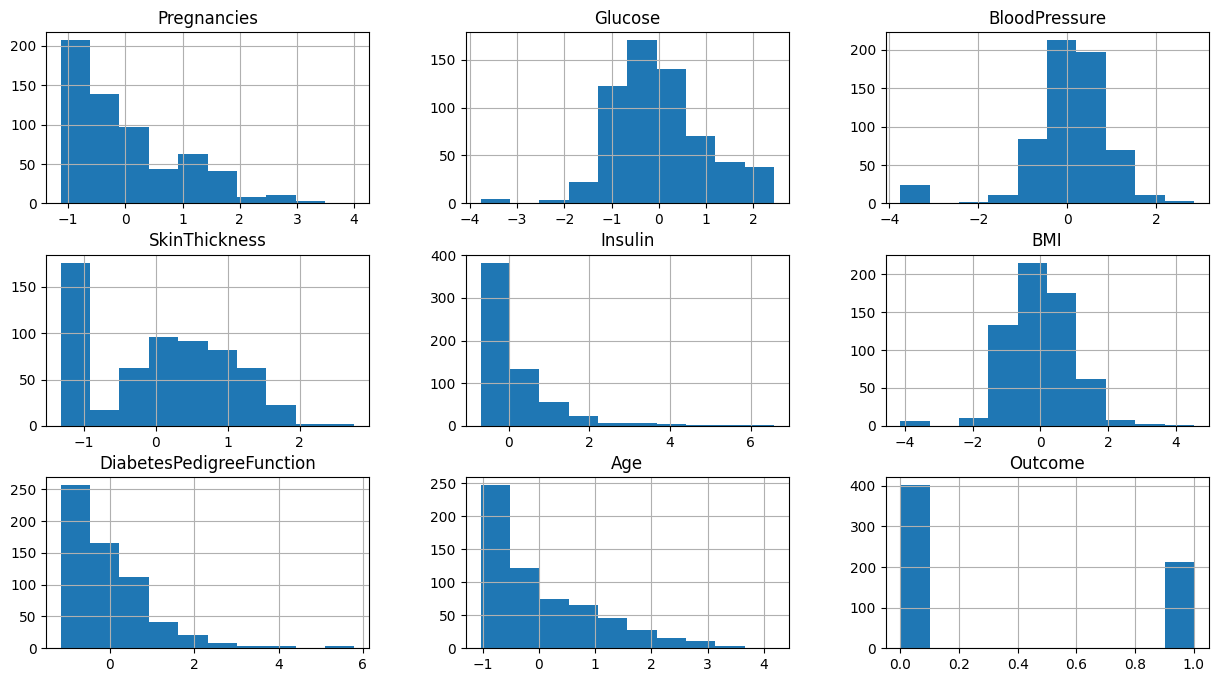

In [129]:
train_data.hist(figsize=(15,8))
plt.show()

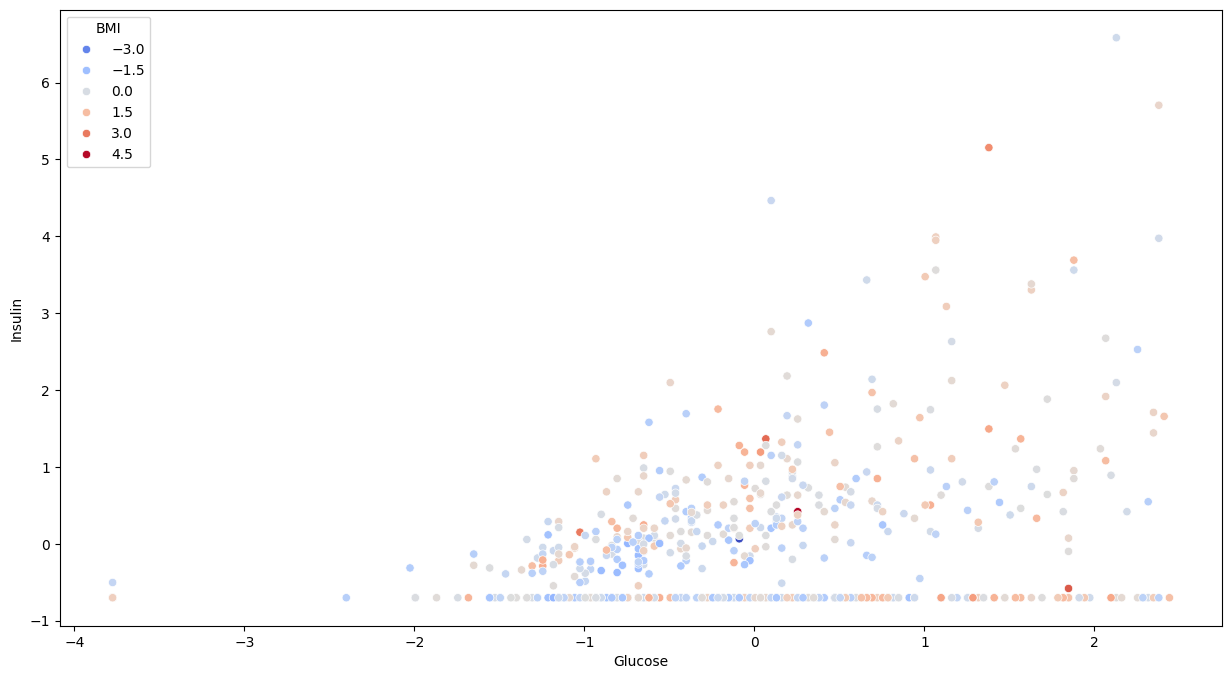

In [88]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="Glucose", y="Insulin", data=train_data, hue="BMI", palette="coolwarm")
plt.show()

In [89]:
train_data['Outcome'].value_counts()

,count
Outcome,
0,401
1,213


In [90]:
class_counts=train_data.groupby("Outcome").size()
columns=['outcome','count','percentage']
outcome=[0,1]
count=list()
percentage=list()
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,outcome,count,percentage
0,0,401,0.381905
1,1,213,0.202857


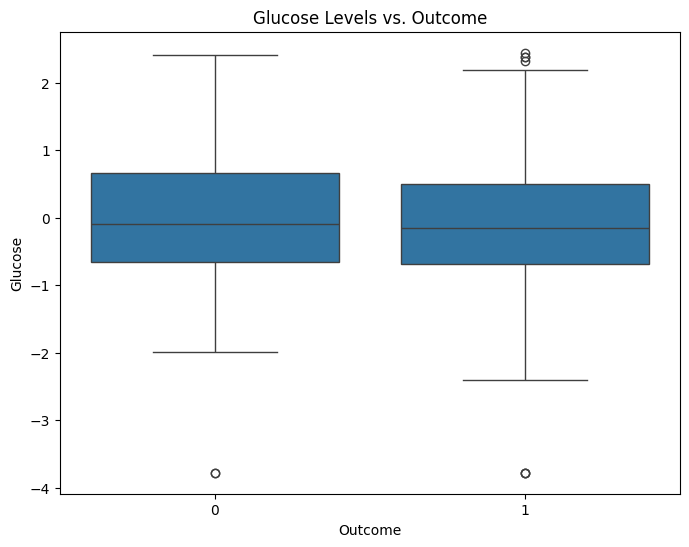

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="Glucose", data=train_data)
plt.title("Glucose Levels vs. Outcome")
plt.show()

/tmp/ipython-input-3360912327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Outcome", y="Glucose", data=train_data, palette="coolwarm")


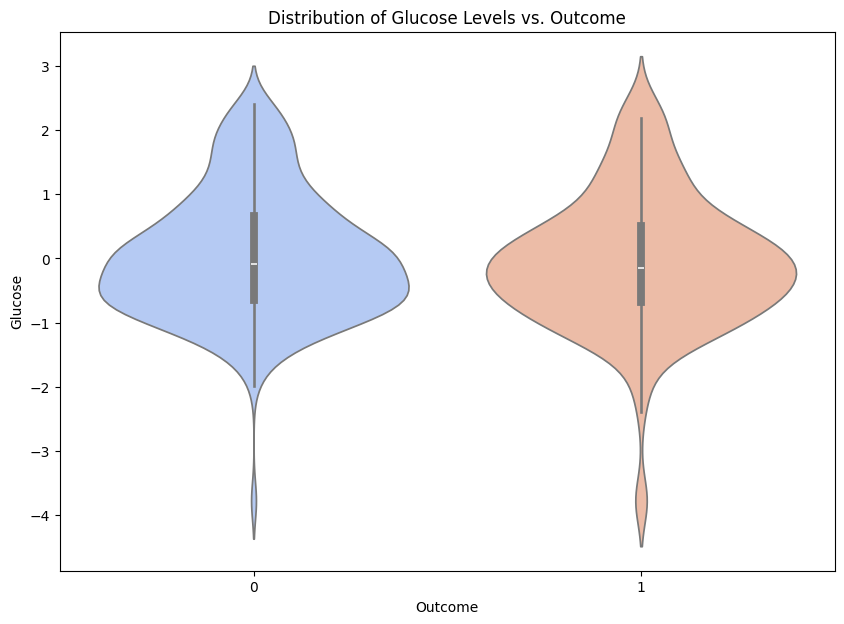

In [92]:
plt.figure(figsize=(10, 7))
sns.violinplot(x="Outcome", y="Glucose", data=train_data, palette="coolwarm")
plt.title("Distribution of Glucose Levels vs. Outcome")
plt.show()

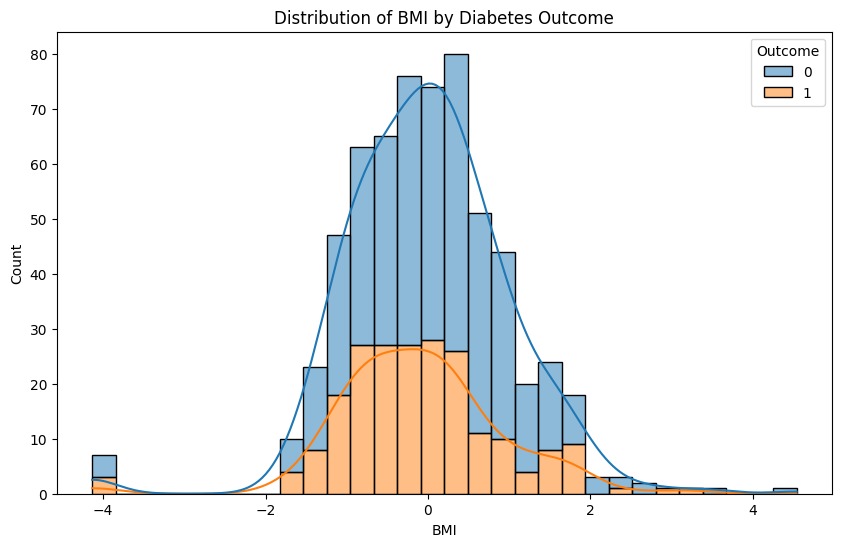

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x="BMI", hue="Outcome", kde=True, bins=30, multiple="stack")
plt.title("Distribution of BMI by Diabetes Outcome")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show() #Does BMI play a significant role? YES

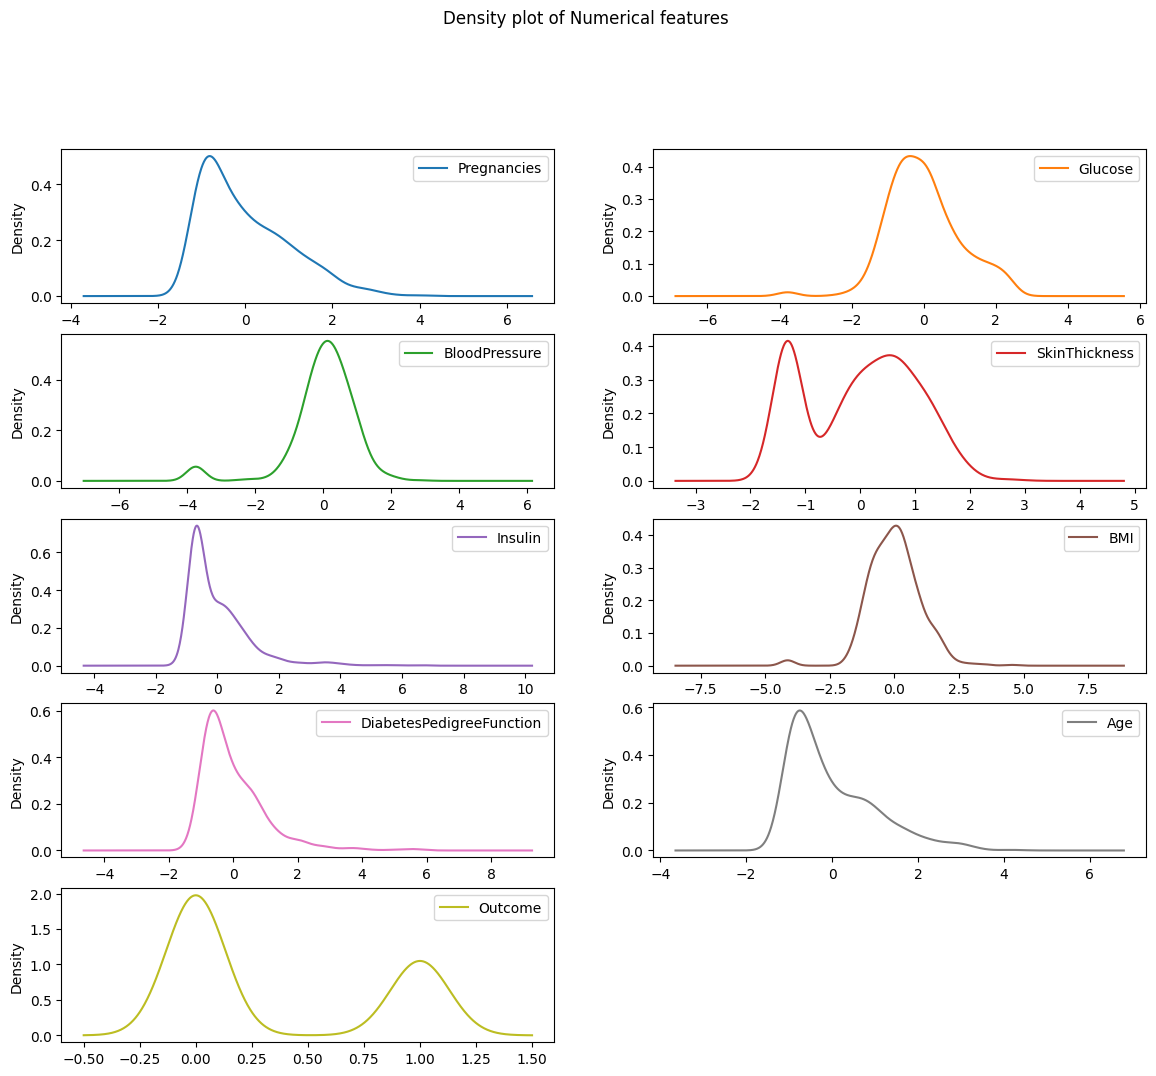

In [94]:
train_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

In [178]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y= pd.DataFrame(sc_y.fit_transform(test_data.drop(['Outcome'], axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure',
                          'SkinThickness', 'Insulin', 'BMI',
                          'DiabetesPedigreeFunction', 'Age'])
test_data=y.join(df['Outcome'])

In [179]:
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression(max_iter=1000)
X = train_data.drop(columns=["Outcome"])
y = train_data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [180]:
model_reg.score(X_test,y_test)

0.7804878048780488

In [188]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
model_RF.score(X_test, y_test)

0.7560975609756098

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}
grid_search = GridSearchCV(
    estimator=model_RF,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [183]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=200)

In [184]:
grid_search.best_estimator_.score(X_test, y_test)

0.7642276422764228

In [189]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model_svc = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf'))
])

model_svc.fit(X_train, y_train)
model_svc.score(X_test, y_test)

0.7235772357723578

In [192]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model_svc = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])
param_grid = {
    'classifier__C': [1, 10, 100, 1000, 5000, 10000],
    'classifier__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 'scale'],
    'classifier__kernel': ['rbf'],
    'classifier__class_weight': [None, 'balanced']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model_svc, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'classifier__C': 5000, 'classifier__class_weight': None, 'classifier__gamma': 1e-05, 'classifier__kernel': 'rbf'}
Best CV Accuracy: 0.7697794269222841
Test Accuracy: 0.7886178861788617


In [194]:
#Another way
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Logistic Regression
pipe_log = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=5000))
])

param_log = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(pipe_log, param_log, cv=cv, scoring='accuracy', n_jobs=-1)
grid_log.fit(X_train, y_train)

print("Logistic Regression Best Params:", grid_log.best_params_)
print("Logistic Regression CV Accuracy:", grid_log.best_score_)
print("Logistic Regression Test Accuracy:", grid_log.score(X_test, y_test))
# SVM
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

param_svc = {
    'classifier__C': [0.1, 1, 10, 100, 1000],
    'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 'scale'],
    'classifier__kernel': ['rbf'],
    'classifier__class_weight': [None, 'balanced']
}

grid_svc = GridSearchCV(pipe_svc, param_svc, cv=cv, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("SVM Best Params:", grid_svc.best_params_)
print("SVM CV Accuracy:", grid_svc.best_score_)
print("SVM Test Accuracy:", grid_svc.score(X_test, y_test))
# Random Forest
pipe_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

param_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(pipe_rf, param_rf, cv=cv, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Random Forest Best Params:", grid_rf.best_params_)
print("Random Forest CV Accuracy:", grid_rf.best_score_)
print("Random Forest Test Accuracy:", grid_rf.score(X_test, y_test))
results = {
    "Logistic Regression": grid_log.score(X_test, y_test),
    "SVM": grid_svc.score(X_test, y_test),
    "Random Forest": grid_rf.score(X_test, y_test)
}

print("\nFinal Comparison:", results)


Logistic Regression Best Params: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Logistic Regression CV Accuracy: 0.7616161616161616
Logistic Regression Test Accuracy: 0.7723577235772358
SVM Best Params: {'classifier__C': 1, 'classifier__class_weight': None, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
SVM CV Accuracy: 0.7657390228818799
SVM Test Accuracy: 0.7804878048780488
Random Forest Best Params: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest CV Accuracy: 0.76573902288188
Random Forest Test Accuracy: 0.7560975609756098

Final Comparison: {'Logistic Regression': 0.7723577235772358, 'SVM': 0.7804878048780488, 'Random Forest': 0.7560975609756098}


In [198]:
from ipywidgets import interact

def predict_form(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    patient_data = {
        "Pregnancies": Pregnancies,
        "Glucose": Glucose,
        "BloodPressure": BloodPressure,
        "SkinThickness": SkinThickness,
        "Insulin": Insulin,
        "BMI": BMI,
        "DiabetesPedigreeFunction": DiabetesPedigreeFunction,
        "Age": Age
    }
    df = pd.DataFrame([patient_data])
    prediction = grid_svc.predict(df)[0]
    result = "Diabetic" if prediction == 1 else "Non-Diabetic"
    print("\nPrediction:", result)

interact(
    predict_form,
    Pregnancies=(0,15,1),
    Glucose=(50,200,1),
    BloodPressure=(40,150,1),
    SkinThickness=(0,100,1),
    Insulin=(0,500,1),
    BMI=(10.0,50.0,0.1),
    DiabetesPedigreeFunction=(0.0,2.5,0.01),
    Age=(15,90,1)
)

interactive(children=(IntSlider(value=7, description='Pregnancies', max=15), IntSlider(value=125, description=…

<function __main__.predict_form(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)>

In [201]:
#Another interface
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

def predict_patient_user(model):
    Pregnancies = widgets.IntText(description="Pregnancies")
    Glucose = widgets.FloatText(description="Glucose")
    BloodPressure = widgets.FloatText(description="BP")
    SkinThickness = widgets.FloatText(description="Skin")
    Insulin = widgets.FloatText(description="Insulin")
    BMI = widgets.FloatText(description="BMI")
    DiabetesPedigreeFunction = widgets.FloatText(description="DPF")
    Age = widgets.IntText(description="Age")
    button = widgets.Button(description="Predict")

    inputs = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

    def on_click(b):
        patient_data = {
            "Pregnancies": Pregnancies.value,
            "Glucose": Glucose.value,
            "BloodPressure": BloodPressure.value,
            "SkinThickness": SkinThickness.value,
            "Insulin": Insulin.value,
            "BMI": BMI.value,
            "DiabetesPedigreeFunction": DiabetesPedigreeFunction.value,
            "Age": Age.value
        }
        df = pd.DataFrame([patient_data])
        prediction = model.predict(df)[0]
        result = "Diabetic" if prediction == 1 else "Non-Diabetic"
        print("Prediction:", result)

    button.on_click(on_click)

    for w in inputs:
        display(w)
    display(button)
predict_patient_user(grid_svc)


IntText(value=0, description='Pregnancies')

FloatText(value=0.0, description='Glucose')

FloatText(value=0.0, description='BP')

FloatText(value=0.0, description='Skin')

FloatText(value=0.0, description='Insulin')

FloatText(value=0.0, description='BMI')

FloatText(value=0.0, description='DPF')

IntText(value=0, description='Age')

Button(description='Predict', style=ButtonStyle())

Prediction: Diabetic
